# TP Bagging, Random Forests, Boosting

In [37]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

### Agrégation de modèles

In [82]:
p=0.7
#L=[1, 5, 10, 50, 100]
L=50
#rv = binom(L, p)
Nl=range(10)
k=range(0,L)
n=1
[binom.pmf(x, n, p) for x in range(int(n/2)+1,n+1)]
#[binom.pmf(x, n, p) for x in range(1,int(n/2))]

[0.7]

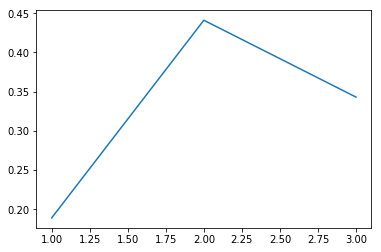

2


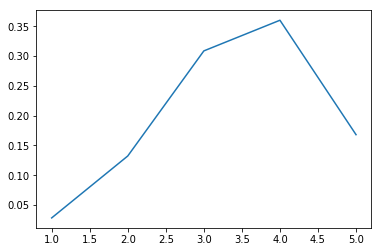

3


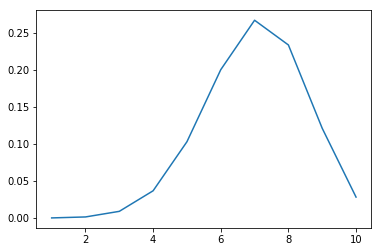

6


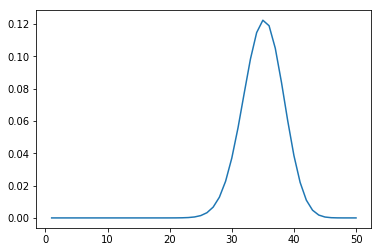

26


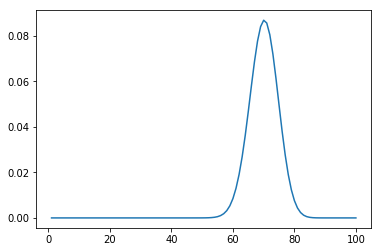

51
la probabilité de prédiciton correcte pour le modèle agrégé est 0.99998 pour 100 classifieur(s)


In [86]:
L=[3, 5, 10, 50, 100]
for n in L:
    x = np.arange(1,n+1)
    plt.plot(x, binom.pmf(x, n, p), '-', label='binom pmf')
    plt.show()
    m = int(n/2)+1
    print(m)
print("la probabilité de prédiciton correcte pour le modèle agrégé est {:.5f} pour {} classifieur(s)".format(sum([binom.pmf(x, n, p) for x in range(m,n+1)]), n))

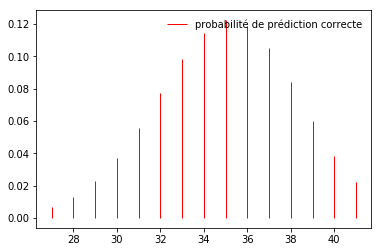

In [67]:
L=50
fig, ax = plt.subplots(1, 1)
rv = binom(L, p)
x = np.arange(binom.ppf(0.01, L, p),binom.ppf(0.99, L, p))
ax.vlines(x, 0, rv.pmf(x), colors='r', linestyles='-', lw=1, label='probabilité de prédiction correcte')
ax.legend(loc='best', frameon=False)
plt.show()

Vote majoritaire : $ g_{\mathcal{A}} = sign \left(\sum_{k=1}^L g_k(x) \right) $
$$\begin{align}P \left(sign(g_\mathcal{A}(x) = y \right)
&= P \left[sign(\sum_{k=1}^L sign(f_i(x)))= y \right] \\
&= P \left[ \sum_{k=1}^L \mathbb{1}_{sign(f_i(x)=y} > \frac L2 \right] \\
&= 1 - P \left[ \sum_{k=1}^L \mathbb{1}_{sign(f_i(x)=y} <= \frac L2 \right] \\
&= 1 -  \sum_{k=1}^{\frac L2} {L \choose k} p^k (1-p)^{L-k}
\end{align}$$

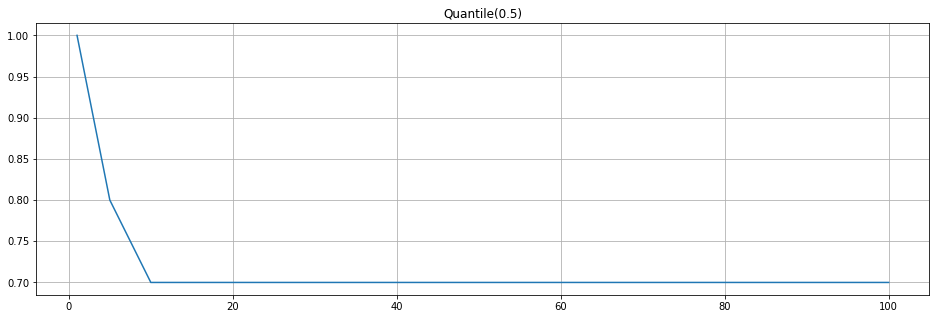

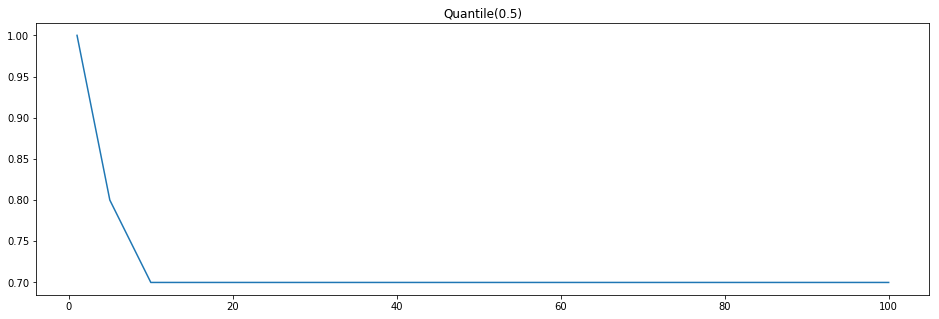

In [74]:
LRange=[1, 5, 10, 50, 100]
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
ax.plot(LRange, [binom(L, p).ppf(0.5)/L for L in LRange])
ax.set_title('Quantile(0.5)')
plt.show()

### Bagging

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 *rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 *(0.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

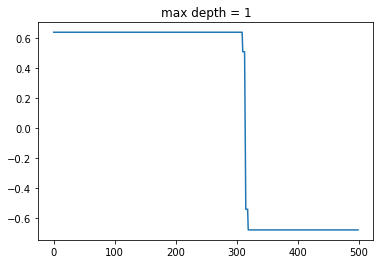

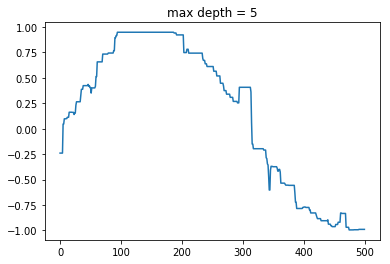

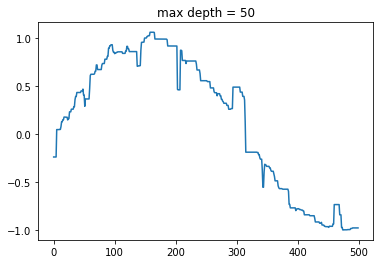

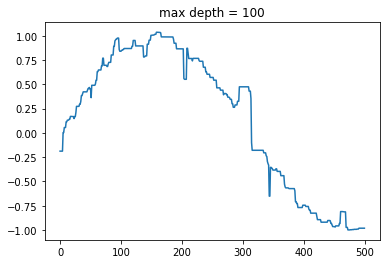

In [88]:
for max_depth in [1,5,50,100]:
    ensemble = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth),
                            max_features=1.0,bootstrap_features=True,
                            random_state=rng).fit(X, y)
    plt.plot(ensemble.predict(X_test))
    plt.title("max depth = {}".format(max_depth))
    plt.show()

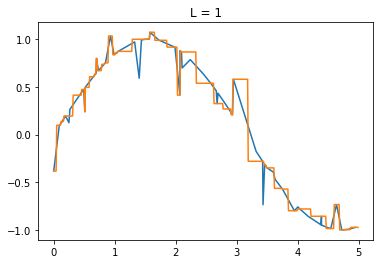

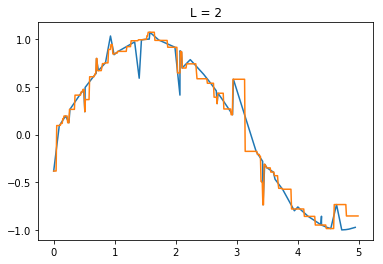

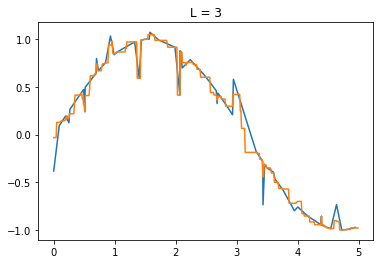

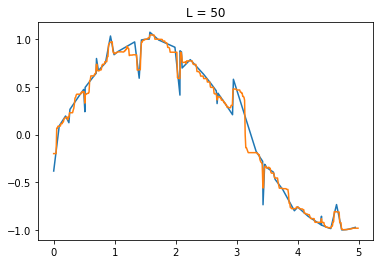

In [110]:
max_depth=5
for L in [1,2,3,50]:
    ensemble = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                            max_features=1.0,bootstrap_features=True, n_estimators=L,
                            random_state=rng).fit(X, y)
    plt.plot(X,y)
    y_pred=ensemble.predict(X_test)
    plt.plot(X_test, y_pred)
    plt.title("L = {}".format(L))
    plt.show()

Le biais augmente très légèrement en augmentant le nombre d'estimateurs mais ceci est peu perceptible. Par contre, la variance diminue.

### Bruit

In [125]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y_noise = np.sin(X).ravel()
y_noise[::2] += 0.1 * (0.3 - rng.rand(40))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
plt.plot(y_noise, legend="noise")
plt.plot(X,y)
plt.show()

AttributeError: Unknown property legend

$\mathbb E$ represente l'esperance sur la loi jointe des 2 variables x et y. Il est néanmoins suffisant de resoudre le probleme de minimisation en conditionnant par x.
comme $y \in \left \{-1, 1 \right \}$, on peut decomposer l'esperance en deux membres
\begin{align}
\mathbb E(exp(-Yf(X) | X = x) = \mathbb P(Y=1 | X=x)e^{-f(x)} + \mathbb P(Y=-1 | X=x)e^{f(x)}
\end{align}
En differenciant par f, on obtient:
\begin{align}
g' = -1 \times \mathbb P(Y=1 | X=x)e^{-f(x)} + 1 \times \mathbb P(Y=-1 | X=x)e^{f(x)}
\end{align}
Le minimum de g est obtenu quand g' = 0, soit en utilisant que  $e^{a}/e^{b}=e^{a-b}$
\begin{align}
g' = 0 &\iff \mathbb P(Y=1 | X=x)e^{-f(x)} = \mathbb P(Y=-1 | X=x)e^{f(x)} \\
       &\iff \frac{e^{f(x)}}{e^{-f(x)}} = \frac{\mathbb P(Y=1 | X=x)}{\mathbb P(Y=-1 | X=x)} \\
       &\iff 2f(x) = log(\left( \frac{\mathbb P(Y=1 | X=x)}{\mathbb P(Y=-1 | X=x)} \right) \\
       &\iff f(x) = \frac{1}{2} log\left( \frac{\mathbb P(Y=1 | X=x)}{\mathbb P(Y=-1 | X=x)} \right)
      \end{align}

le classifier de Bayes associe au risque 0/1, $R_{\phi_0}$ est $h^*_{0/1} = sign(2\eta - 1)$
le classifier de Bayes associe au risque $R_{exp}$ est $h^*_{exp} = sign(f^*_{exp})$ avec $f_{exp}^*= \frac{1}{2} log\left(\frac{\eta(x)}{1-\eta(x)}\right)$
$\eta(x) > 0.5 \Rightarrow sign(2\eta - 1) = sign(f^*_{exp}) = 1$
$\eta(x) < 0.5 \Rightarrow sign(2\eta - 1) = sign(f^*_{exp}) = -1$